In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification/

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
%matplotlib inline

In [5]:
df = pd.read_excel("data2.xlsx")
df.index.freq='MS'

In [6]:
df.head()

,Classes,Sentences
0,2,"Yok, sağ olasın."
1,2,"Yani, yaptığı bütün o korkunç şeylerden sonra ..."
2,1,At tam gözden kaybolmadan önce aniden dönerek ...
3,1,Patika da yoldan sağa doğru ayrılıp yaşlı bir ...
4,1,Sağa sola sallanıyordu.


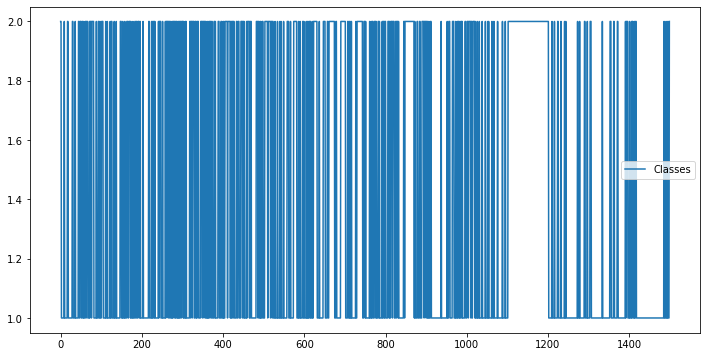

In [7]:
df.plot(figsize=(12,6))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
len(df)

1500

In [18]:
df['Classes'].value_counts()

1    915
2    585
Name: Classes, dtype: int64

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [29]:
bow_transformer = CountVectorizer().fit(df['Sentences'])
bow_transformer.vocabulary_
title_bow = bow_transformer.transform(df['Sentences'])
print(title_bow)

  (0, 4410)	1
  (0, 5030)	1
  (0, 6383)	1
  (1, 900)	1
  (1, 1095)	1
  (1, 1118)	1
  (1, 1824)	1
  (1, 3653)	1
  (1, 4265)	1
  (1, 4506)	1
  (1, 5030)	1
  (1, 5263)	1
  (1, 5361)	1
  (1, 6108)	1
  (1, 6164)	1
  (1, 6631)	1
  (1, 7124)	1
  (2, 230)	1
  (2, 364)	1
  (2, 521)	1
  (2, 1644)	1
  (2, 2319)	1
  (2, 2502)	1
  (2, 3012)	1
  (2, 3402)	1
  :	:
  (1497, 5468)	1
  (1497, 6188)	1
  (1498, 196)	1
  (1498, 872)	1
  (1498, 1113)	1
  (1498, 1193)	1
  (1498, 3260)	1
  (1498, 4998)	1
  (1498, 5031)	1
  (1498, 5234)	1
  (1498, 5409)	1
  (1498, 5780)	1
  (1498, 6334)	1
  (1499, 687)	1
  (1499, 872)	1
  (1499, 995)	1
  (1499, 1222)	1
  (1499, 3065)	1
  (1499, 4460)	1
  (1499, 4991)	1
  (1499, 5030)	1
  (1499, 5400)	1
  (1499, 5893)	1
  (1499, 6580)	1
  (1499, 6845)	1


In [21]:
dataframe = pd.DataFrame(title_bow.toarray(),columns = bow_transformer.get_feature_names_out())

In [22]:
bow_transformer.vocabulary_

{'yok': 6383,
 'sağ': 5030,
 'olasın': 4410,
 'yani': 6108,
 'yaptığı': 6164,
 'bütün': 1095,
 'korkunç': 3653,
 'şeylerden': 7124,
 'sonra': 5263,
 'elflerle': 1824,
 'birlikte': 900,
 'onu': 4506,
 'bıraktığınızı': 1118,
 'mı': 4265,
 'söylemeye': 5361,
 'çalışıyorsun': 6631,
 'at': 364,
 'tam': 5517,
 'gözden': 2502,
 'kaybolmadan': 3402,
 'önce': 6935,
 'aniden': 230,
 'dönerek': 1644,
 'taraftaki': 5545,
 'ağaçların': 521,
 'içine': 3012,
 'girmişti': 2319,
 'patika': 4664,
 'da': 1222,
 'yoldan': 6401,
 'sağa': 5031,
 'doğru': 1539,
 'ayrılıp': 460,
 'yaşlı': 6293,
 'bir': 872,
 'meşe': 4173,
 'ormanından': 4539,
 'dolanarak': 1492,
 'ormansaray': 4536,
 'ulaşıyordu': 5823,
 'sola': 5234,
 'sallanıyordu': 4906,
 'çalıların': 6617,
 'ardında': 306,
 'gizleniyordu': 2350,
 'hemen': 2718,
 'karşıya': 3352,
 'geçip': 2239,
 'sağdan': 5035,
 'devam': 1379,
 'etmemiz': 1933,
 'gerekir': 2177,
 'giriş': 2308,
 'yanlarında': 6111,
 'beliriveren': 781,
 'yüksek': 6465,
 'iki': 2828,
 'bey

In [25]:
tokens = bow_transformer.get_feature_names_out()
print(tokens)

['000' '10' '12' ... 'şükürler' 'şüpheniz' 'şımarıktı']


In [26]:
X = title_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1500, 7173)

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [53]:
#model


embedding_vector_features=45

model=Sequential()

model.add(Embedding(1,35,input_length=45))

model.add(LSTM(128,input_shape=(df.shape),activation='relu',return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))

model.add(Dropout(0.2))

# for units in [128,128,64,32]:

# model.add(Dense(units,activation='relu'))

# model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(4,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 45, 35)            35        
                                                                 
 lstm_2 (LSTM)               (None, 45, 128)           83968     
                                                                 
 dropout_3 (Dropout)         (None, 45, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, df['Classes'], test_size= 0.3, random_state= 50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1050, 7173)
(450, 7173)
(1050,)
(450,)


In [61]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train, y_train)

In [64]:
prediction = model.predict(x_test)
print(prediction)

[1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 2 1 2 2 1 1 1 2 2 1 1 2 1 1 2
 1 2 1 1 1 1 1 1 2 2 2 1 2 1 2 1 1 1 1 2 1 1 2 2 1 1 2 1 2 1 1 2 1 2 2 1 2
 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 2 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 1 1 1 1 2 1 1 1 2 2 2 1 1 2 1 2 1 1 1
 1 2 1 2 1 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 2 2 1 1 2 1 2
 1 1 1 2 1 1 2 2 1 1 2 1 1 2 1 2 1 2 1 1 2 1 1 2 1 2 1 1 1 2 2 1 1 2 1 2 1
 1 2 1 2 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2
 1 1 2 1 1 1 1 2 2 2 2 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 2 1 1 2 2 1 2 2 1 1 1 2 1 2 1 1 2 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 2 1
 2 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 1 2
 1 2 1 2 2 1 2 1 2 2 1 2 2 2 2 1 1 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 2
 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 2 2 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1
 1 1 1 2 1 1]


In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [67]:
acc = accuracy_score(prediction, y_test)
mat = confusion_matrix(y_test, prediction)
f1 = f1_score(y_test, prediction, average="weighted")
print("Accuracy of model is: ", acc)
print("F1 Score of model is:", f1)
print("Confusion matrix: \n", mat)

Accuracy of model is:  0.9044444444444445
F1 Score of model is: 0.9042562616413425
Confusion matrix: 
 [[265  20]
 [ 23 142]]
